## Objective

The goal of this project is to classify job postings into relevant categories using **Support Vector Machine (SVM) with an RBF kernel**. The process includes:

- **Data Preprocessing**: Cleaning and transforming raw job posting text.  
- **Feature Engineering**: Extracting meaningful features for better model performance.  
- **Model Training**: Applying SVM with an RBF kernel to classify job postings accurately.  
- **Evaluation**: Assessing the model's performance using appropriate metrics.  


🔹 **Step 1: Load the Dataset**

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder


In [3]:
df=pd.read_csv('student_data.csv')
df.sample(10)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9754,9755,7.6,0.0,1,0,70,3.5,No,Yes,64,70,NotPlaced
7453,7454,7.5,2.0,3,0,84,4.5,Yes,Yes,71,68,NotPlaced
4722,4723,NaN,2.0,2,1,65,4.8,Yes,No,56,68,NotPlaced
2866,2867,7.7,1.0,3,1,76,4.0,No,No,65,61,NotPlaced
1378,1379,8.5,1.0,1,2,85,4.8,Yes,Yes,73,84,Placed
4501,4502,7.2,1.0,2,2,76,3.6,No,No,60,75,NotPlaced
6547,6548,7.7,0.0,1,0,82,4.7,Yes,Yes,62,68,NotPlaced
3803,3804,8.5,2.0,2,2,89,4.8,Yes,Yes,68,83,Placed
4926,4927,8.6,NaN,3,2,90,4.8,Yes,Yes,73,88,Placed
2409,2410,7.9,1.0,1,1,76,4.4,Yes,Yes,65,85,NotPlaced


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       8036 non-null   float64
 2   Internships                8060 non-null   float64
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(3), int64(6), object(3)
memory usage: 937.6+ KB


## Step 2: **Handling Missing Values**  

🔹 **Option 1: Remove Missing Values** – Best if only a few values are missing.  
🔹 **Option 2: Impute Missing Values** – Fill missing entries using an appropriate strategy:  
   - Mean (for numerical data)  
   - Median (for skewed numerical data)  
   - Mode (for categorical data)  
    


In [5]:
#Imputation for Numerical Columns (CGPA, Internships)
df["CGPA"].fillna(df["CGPA"].mean(), inplace=True)  # Mean imputation
df["Internships"].fillna(df["Internships"].median(), inplace=True)  # Median imputation


<ipython-input-5-ae405d121f16>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CGPA"].fillna(df["CGPA"].mean(), inplace=True)  # Mean imputation
<ipython-input-5-ae405d121f16>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [6]:
#Verify Missing Values Again
df.isnull().sum()


,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


## 🔹 Step 3: Handling Categorical Variables  

The dataset includes categorical columns that need conversion into numerical values:  

- **ExtracurricularActivities**: Yes/No  
- **PlacementTraining**: Yes/No  
- **PlacementStatus** (Target Variable): Placed/Not Placed  

We will encode these categorical features to ensure compatibility with machine learning models.  


In [7]:
# Convert categorical columns to numerical values
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].map({"Yes": 1, "No": 0})
df["PlacementTraining"] = df["PlacementTraining"].map({"Yes": 1, "No": 0})
df["PlacementStatus"] = df["PlacementStatus"].map({"Placed": 1, "NotPlaced": 0})  # Target Variable


In [8]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1.0,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0.0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1.0,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1.0,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1.0,2,2,86,4.5,1,1,74,88,1


# 🔹 Step 4: Feature Scaling
The dataset contains numerical columns with different ranges. We need to normalize or standardize them.

In [9]:
scaler = StandardScaler()
df[['CGPA', 'SSC_Marks', 'HSC_Marks', 'AptitudeTestScore', 'SoftSkillsRating']] = scaler.fit_transform(
    df[['CGPA', 'SSC_Marks', 'HSC_Marks', 'AptitudeTestScore', 'SoftSkillsRating']]

)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  float64
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  float64
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  float64
 10  HSC_Marks                  10000 non-null  float64
 11  PlacementStatus            10000 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


# 🔹 Step 6: Splitting Data into Training and Testing Sets

In [11]:
# Define features (X) and target variable (y)
X = df.drop(columns=["PlacementStatus"])  # Features
y = df["PlacementStatus"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8000, 11)
Testing set size: (2000, 11)


# 📌 **Exploratory Data Analysis (EDA) for Student Placement Dataset**

EDA helps us understand the dataset by analyzing patterns, detecting anomalies, and visualizing relationships between variables.

📌 Step 1: Summary Statistics

In [12]:
# Summary statistics of numerical columns
df.describe()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,5000.50000,-1.194067e-15,1.036600,2.026600,1.013200,7.815970e-17,3.047518e-15,0.585400,0.731800,-4.924061e-16,7.929657e-16,0.419700
std,2886.89568,1.000050e+00,0.598746,0.867968,0.904272,1.000050e+00,1.000050e+00,0.492677,0.443044,1.000050e+00,1.000050e+00,0.493534
min,1.00000,-2.082080e+00,0.000000,0.000000,0.000000,-2.383686e+00,-3.216605e+00,0.000000,0.000000,-1.357573e+00,-1.962254e+00,0.000000
25%,2500.75000,-3.413632e-01,1.000000,1.000000,0.000000,-7.904688e-01,-7.870717e-01,0.000000,0.000000,-9.740615e-01,-8.410620e-01,0.000000
50%,5000.50000,-1.546067e-15,1.000000,2.000000,1.000000,6.741761e-02,1.847417e-01,1.000000,1.000000,8.059492e-02,-1.683469e-01,0.000000
75%,7500.25000,7.030666e-01,1.000000,3.000000,2.000000,9.253040e-01,9.136018e-01,1.000000,1.000000,8.476178e-01,9.528449e-01,1.000000
max,10000.00000,2.443783e+00,2.000000,3.000000,3.000000,1.292970e+00,1.156555e+00,1.000000,1.000000,1.998152e+00,1.513441e+00,1.000000


# 🔹 1.2: Summary of Categorical Features

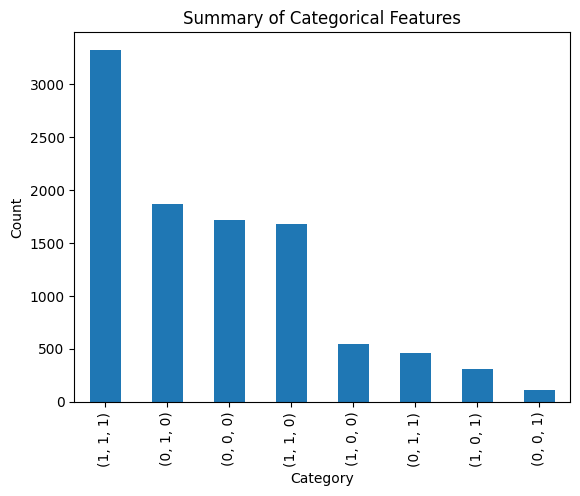

In [13]:
# Count unique values for categorical columns
df[['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Summary of Categorical Features')
plt.show()


# 📌 Step 2: Visualizing Distributions
**🔹 2.1: Histogram of Numerical Features**

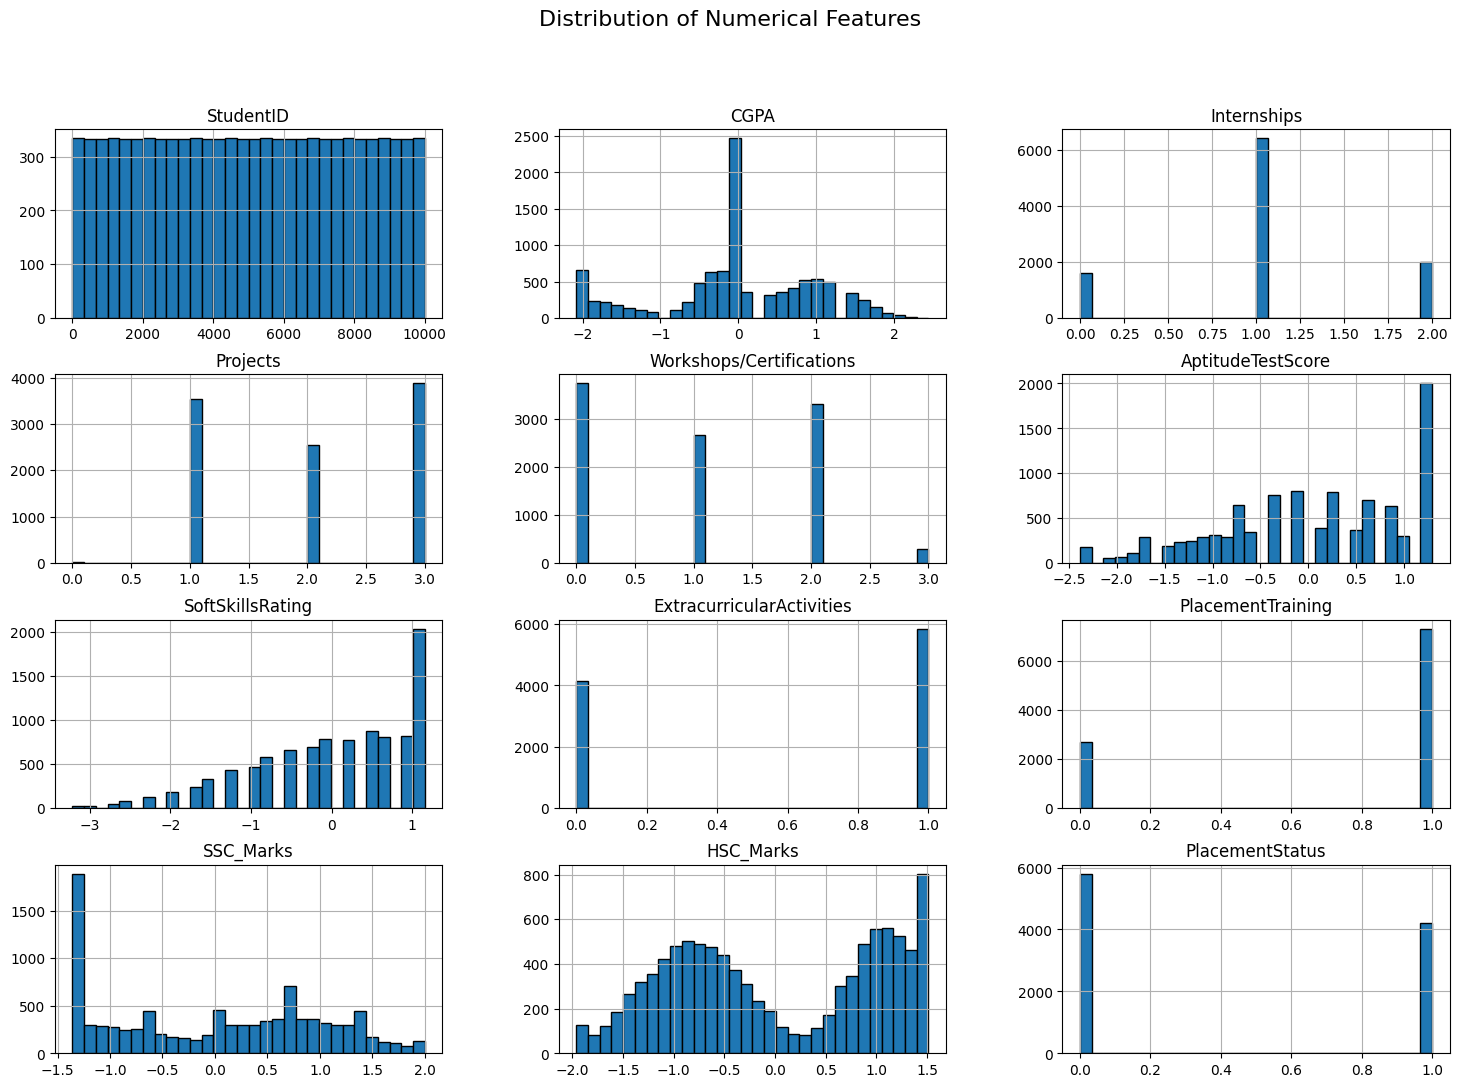

In [14]:
df.hist(figsize=(18, 12), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


# 🔹 2.2: Boxplots to Detect Outliers

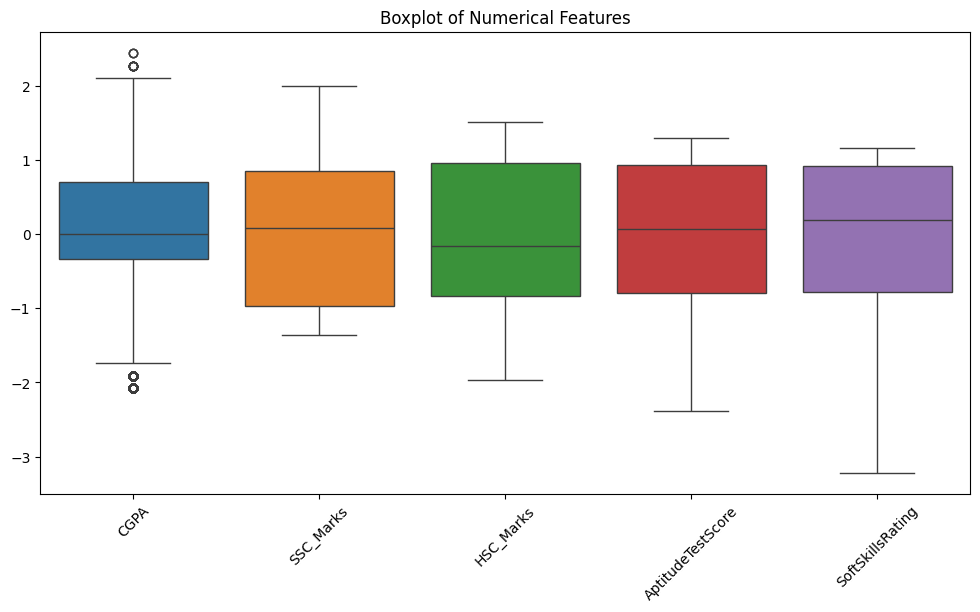

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['CGPA', 'SSC_Marks', 'HSC_Marks', 'AptitudeTestScore', 'SoftSkillsRating']])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


# 📌 Step 3: Relationship Between Features
**🔹 3.1: Correlation Heatmap**

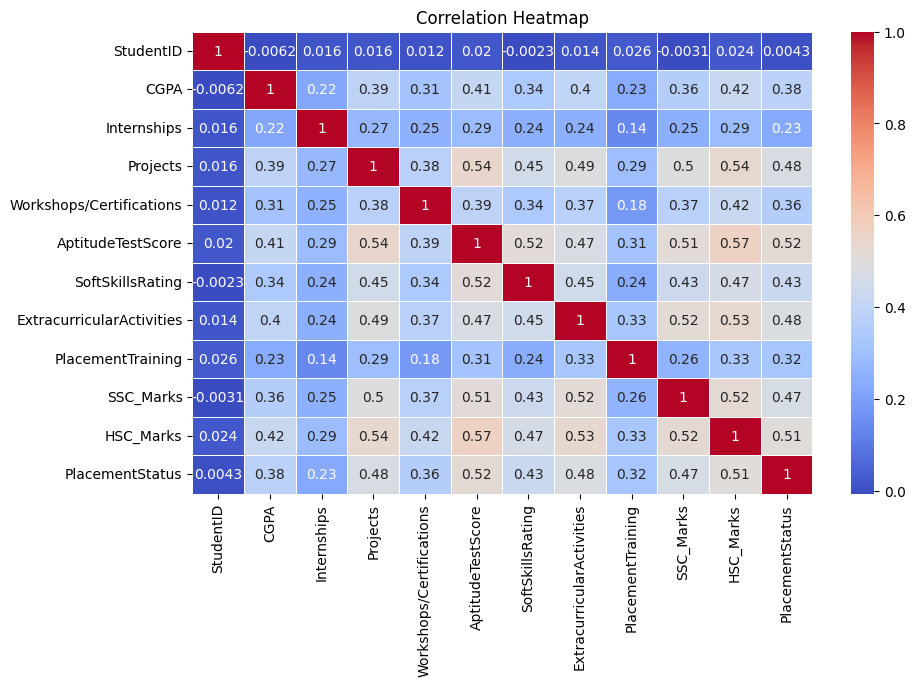

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


# 🔹 3.2: Pairplot to Explore Relationships

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7a27cbef6980> (for post_execute):


KeyboardInterrupt: 

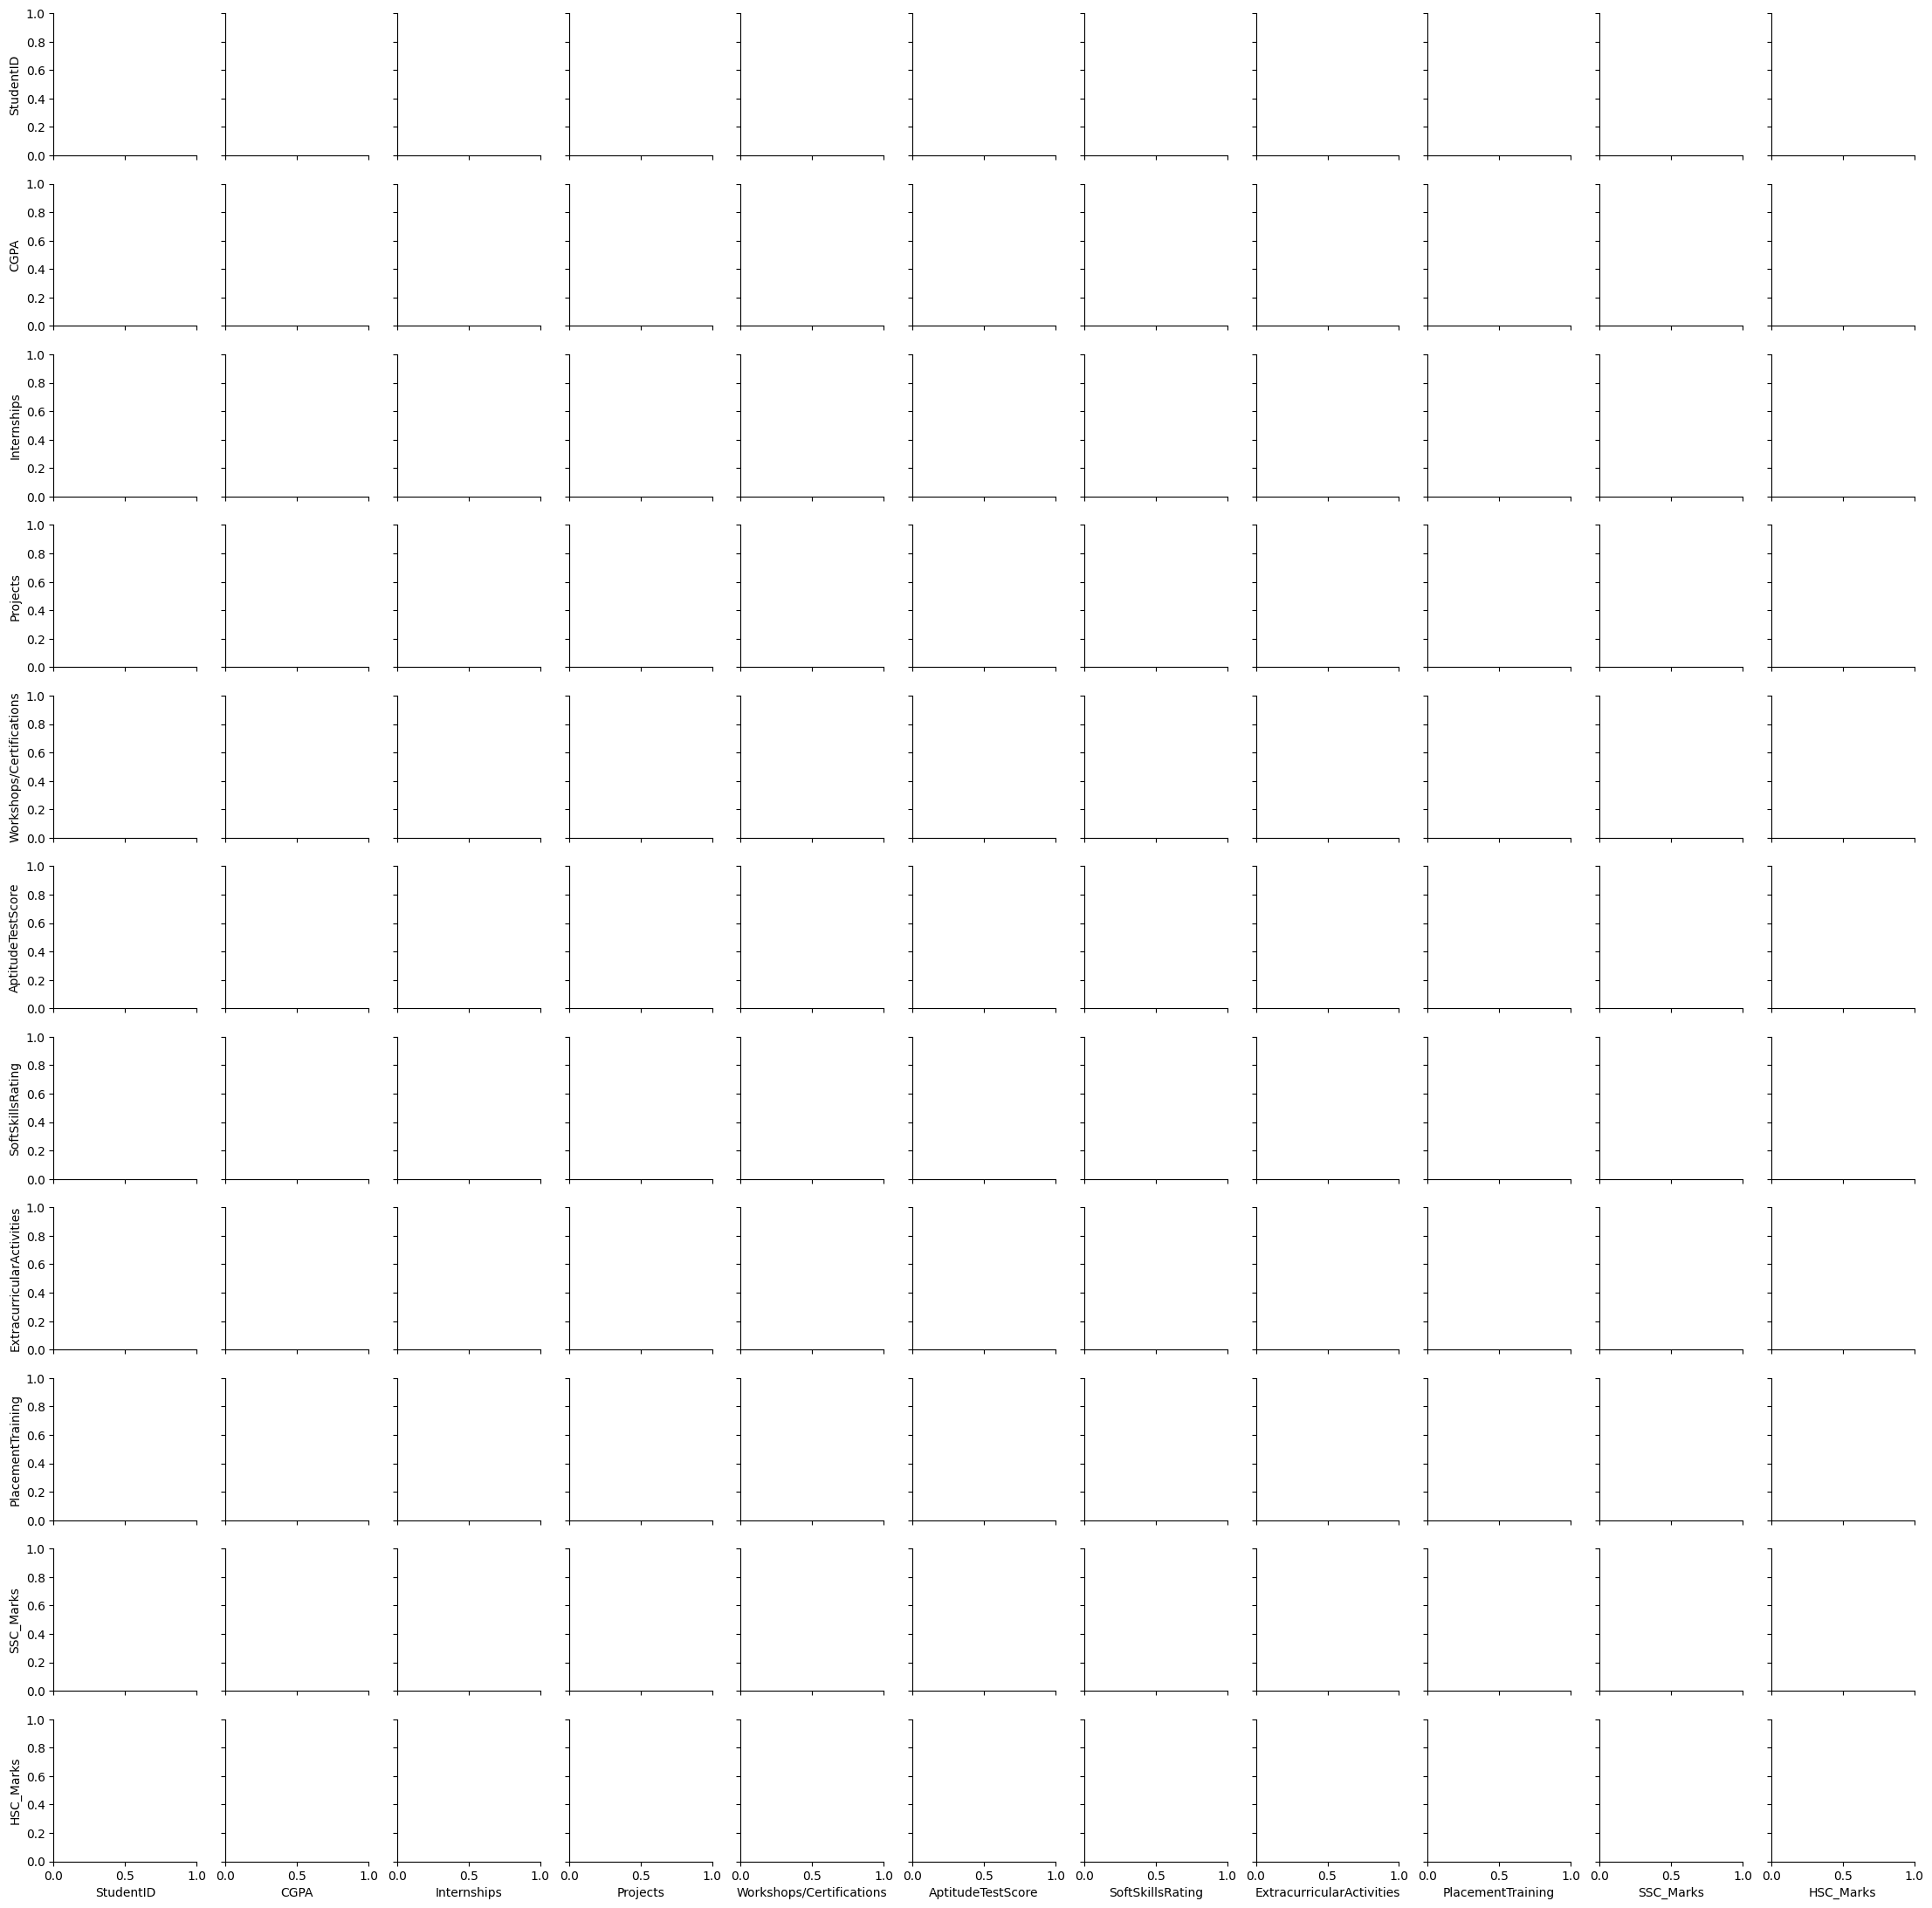

In [16]:
sns.pairplot(df, hue="PlacementStatus", diag_kind="kde")
plt.show()


# 📌 Step 4: Categorical Variable Analysis
**🔹 4.1: Placement Status Distribution**

<ipython-input-17-636304fe4ce4>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PlacementStatus", data=df, palette="pastel")


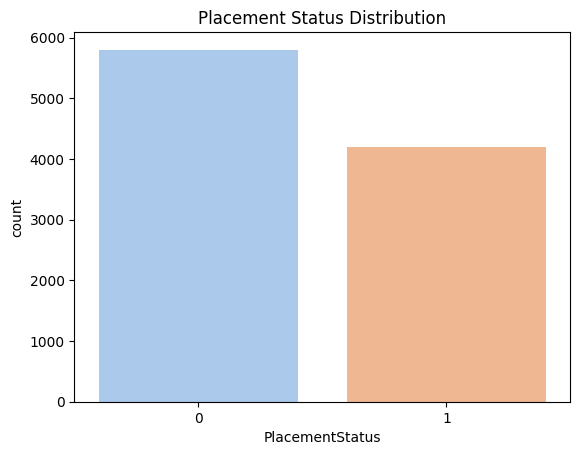

In [17]:
sns.countplot(x="PlacementStatus", data=df, palette="pastel")
plt.title("Placement Status Distribution")
plt.show()


# 🔹 4.2: Impact of Placement Training

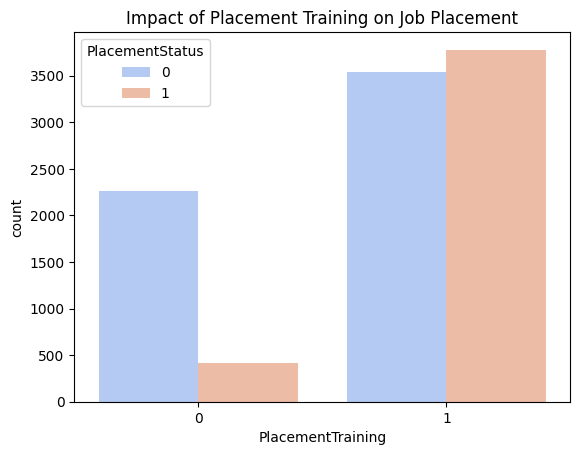

In [18]:
sns.countplot(x="PlacementTraining", hue="PlacementStatus", data=df, palette="coolwarm")
plt.title("Impact of Placement Training on Job Placement")
plt.show()


## 🔹 Step 5 & 6: Training and Evaluating SVM Models  

To classify job postings, we will train **Support Vector Machine (SVM) models** using two different kernels:  

1. **Linear Kernel**: Assumes data is linearly separable.  
2. **Radial Basis Function (RBF) Kernel**: Captures complex, non-linear relationships.  

Each model will be trained on the dataset and evaluated using:  
✅ **Accuracy** – Measures overall classification performance.  
✅ **Confusion Matrix** – Shows the distribution of correct and incorrect predictions.  
✅ **Classification Report** – Provides precision, recall, and F1-score for each class.  

We will compare these models to determine which performs better for job posting classification. 🚀  


**fractal implementation try..**

##########################################################

In [22]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# ========== Step 2: Build RBF curve points to interpolate ==========
gamma = 0.1
d_values = np.linspace(0, 10, 5)  # Distance values
y_values = np.exp(-gamma * d_values)  # RBF output

# Safe sigmoid to avoid overflow
def alpha(x):
    x = np.asarray(x)  # ensure array input
    return 1 / (1 + np.exp(-np.clip(x, -50, 50)))


# ========== Step 3: Build zipper fractal interpolation ==========
n = len(d_values) - 1
e = [1] * n
c, d, a, b = [], [], [], []

x = d_values
y = y_values

for i in range(n):
    denom = x[n] - x[0]
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha(x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha(x[0]) * y[0]))) / denom)

    c.append(((y[i + 1 - e[i]] - alpha(x[n]) * y[n]) -
              (y[i + e[i]] - alpha(x[0]) * y[0])) / denom)

    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / denom)
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / denom)

# Define the zipper transformations
transformations = []
for i in range(n):
    def wi(xi, yi, i=i):
        return [a[i] * xi + b[i], alpha(xi) * yi + c[i] * xi + d[i]]
    transformations.append(wi)

# ========== Step 4: Fractal evaluation of kernel ==========
def fractal_eval(x, depth=2):
    points = [(x, np.exp(-gamma * x))]  # start from original point
    for _ in range(depth):
        new_points = []
        for (xi, yi) in points:
            for w in transformations:
                new_points.append(w(xi, yi))
        points = new_points
    avg_y = np.mean([y for x, y in points])
    return avg_y

# ========== Step 5: Define custom kernel ==========
def zipper_fractal_kernel(X1, X2):
    K = np.zeros((len(X1), len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            dist = np.linalg.norm(X1[i] - X2[j]) ** 2
            K[i, j] = fractal_eval(dist, depth=2)
        print(f"Row {i+1}/{len(X1)} done")  # See if progress happens
    return K

# ========== Step 6: Train SVM with fractalized kernel ==========
class FractalSVM(SVC):
    def __init__(self, **kwargs):
        super().__init__(kernel='precomputed', **kwargs)

    def fit(self, X, y):
        self.X_train_ = X.values  # Convert DataFrame to NumPy array
        K_train = zipper_fractal_kernel(self.X_train_, self.X_train_)
        return super().fit(K_train, y)

    def predict(self, X):
        X = X.values # Convert DataFrame to NumPy array
        K_test = zipper_fractal_kernel(X, self.X_train_)
        return super().predict(K_test)

# Assuming X_train_scaled and X_test_scaled are still DataFrames
fractal_svm = FractalSVM(C=1.0)
fractal_svm.fit(X_train, y_train)
y_pred = fractal_svm.predict(X_test)


print("\nZipper Fractal RBF Kernel SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ========== Optional: Plot RBF vs Fractal Interpolation ==========
plt.figure(figsize=(8, 4))
x_plot = np.linspace(0, 10, 500)
y_rbf = np.exp(-gamma * x_plot)
y_fractal = [fractal_eval(xi, depth=5) for xi in x_plot]

plt.plot(x_plot, y_rbf, label="Original RBF", linewidth=2)
plt.plot(x_plot, y_fractal, label="Fractal Interpolated RBF", linestyle="--")
plt.title("Original RBF vs Zipper Fractal Kernel")
plt.xlabel("Distance (||x - x'||^2)")
plt.ylabel("Kernel Value")
plt.legend()
plt.grid(True)
plt.show()


Row 1/8000 done
Row 2/8000 done
Row 3/8000 done
Row 4/8000 done
Row 5/8000 done
Row 6/8000 done
Row 7/8000 done
Row 8/8000 done
Row 9/8000 done
Row 10/8000 done
Row 11/8000 done
Row 12/8000 done
Row 13/8000 done
Row 14/8000 done
Row 15/8000 done
Row 16/8000 done
Row 17/8000 done
Row 18/8000 done
Row 19/8000 done
Row 20/8000 done
Row 21/8000 done
Row 22/8000 done
Row 23/8000 done
Row 24/8000 done
Row 25/8000 done
Row 26/8000 done
Row 27/8000 done
Row 28/8000 done
Row 29/8000 done
Row 30/8000 done
Row 31/8000 done
Row 32/8000 done
Row 33/8000 done
Row 34/8000 done
Row 35/8000 done
Row 36/8000 done
Row 37/8000 done
Row 38/8000 done
Row 39/8000 done
Row 40/8000 done
Row 41/8000 done
Row 42/8000 done
Row 43/8000 done
Row 44/8000 done
Row 45/8000 done
Row 46/8000 done
Row 47/8000 done
Row 48/8000 done
Row 49/8000 done
Row 50/8000 done
Row 51/8000 done
Row 52/8000 done
Row 53/8000 done
Row 54/8000 done
Row 55/8000 done
Row 56/8000 done
Row 57/8000 done
Row 58/8000 done
Row 59/8000 done
Row 60

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-22-804e720c5346>", line 85, in <cell line: 0>
    fractal_svm.fit(X_train, y_train)
  File "<ipython-input-22-804e720c5346>", line 75, in fit
    K_train = zipper_fractal_kernel(self.X_train_, self.X_train_)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-22-804e720c5346>", line 64, in zipper_fractal_kernel
    K[i, j] = fractal_eval(dist, depth=2)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-22-804e720c5346>", line 53, in fractal_eval
    new_points.append(w(xi, yi))
                      ^^^^^^^^^
  File "<ipython-input-22-804e720c5346>", line 43, in wi
    return [a[i] * xi + b[i], alpha(xi) * yi + c[i] * xi + d[i]]
                              ^^^^^^^^^
  File "<ipython-input-22-804e720c5346>", line 17, in 

TypeError: object of type 'NoneType' has no len()

Updated code......


Row 1/80 done
Row 2/80 done
Row 3/80 done
Row 4/80 done
Row 5/80 done
Row 6/80 done
Row 7/80 done
Row 8/80 done
Row 9/80 done
Row 10/80 done
Row 11/80 done
Row 12/80 done
Row 13/80 done
Row 14/80 done
Row 15/80 done
Row 16/80 done
Row 17/80 done
Row 18/80 done
Row 19/80 done
Row 20/80 done
Row 21/80 done
Row 22/80 done
Row 23/80 done
Row 24/80 done
Row 25/80 done
Row 26/80 done
Row 27/80 done
Row 28/80 done
Row 29/80 done
Row 30/80 done
Row 31/80 done
Row 32/80 done
Row 33/80 done
Row 34/80 done
Row 35/80 done
Row 36/80 done
Row 37/80 done
Row 38/80 done
Row 39/80 done
Row 40/80 done
Row 41/80 done
Row 42/80 done
Row 43/80 done
Row 44/80 done
Row 45/80 done
Row 46/80 done
Row 47/80 done
Row 48/80 done
Row 49/80 done
Row 50/80 done
Row 51/80 done
Row 52/80 done
Row 53/80 done
Row 54/80 done
Row 55/80 done
Row 56/80 done
Row 57/80 done
Row 58/80 done
Row 59/80 done
Row 60/80 done
Row 61/80 done
Row 62/80 done
Row 63/80 done
Row 64/80 done
Row 65/80 done
Row 66/80 done
Row 67/80 done
Row 

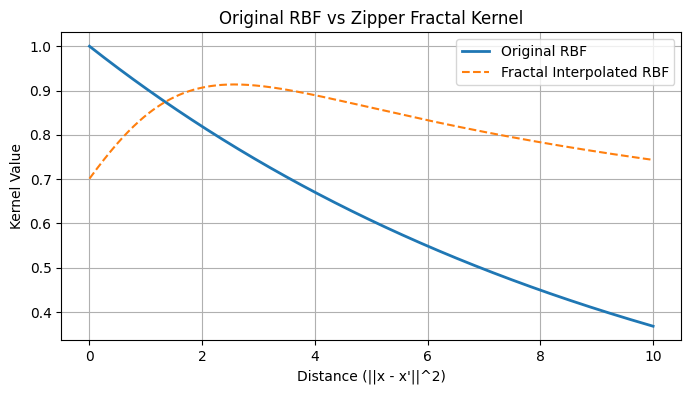

In [26]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# ========== Step 2: Build RBF curve points to interpolate ==========
gamma = 0.1
d_values = np.linspace(0, 10, 5)  # Distance values
y_values = np.exp(-gamma * d_values)  # RBF output

# Safe sigmoid to avoid overflow
def alpha(x):
    x = np.asarray(x)  # ensure array input
    return 1 / (1 + np.exp(-np.clip(x, -50, 50)))

# ========== Step 3: Build zipper fractal interpolation ==========
n = len(d_values) - 1
e = [1] * n
c, d, a, b = [], [], [], []

x = d_values
y = y_values

for i in range(n):
    denom = x[n] - x[0]
    d.append(((x[0] * (y[i + 1 - e[i]] - alpha(x[n]) * y[n])) -
              (x[n] * (y[i + e[i]] - alpha(x[0]) * y[0]))) / denom)

    c.append(((y[i + 1 - e[i]] - alpha(x[n]) * y[n]) -
              (y[i + e[i]] - alpha(x[0]) * y[0])) / denom)

    a.append((x[i + 1 - e[i]] - x[i + e[i]]) / denom)
    b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / denom)

# Define the zipper transformations
transformations = []
for i in range(n):
    def wi(xi, yi, i=i):
        return [a[i] * xi + b[i], alpha(xi) * yi + c[i] * xi + d[i]]
    transformations.append(wi)

# ========== Step 4: Fractal evaluation of kernel ==========
def fractal_eval(x, depth=2):
    points = [(x, np.exp(-gamma * x))]
    for _ in range(depth):
        new_points = []
        for (xi, yi) in points:
            for w in transformations:
                new_points.append(w(xi, yi))
        points = new_points
    avg_y = np.mean([y for x, y in points])
    return avg_y

# ========== Step 5: Define custom kernel ==========
def zipper_fractal_kernel(X1, X2):
    K = np.zeros((len(X1), len(X2)))
    for i in range(len(X1)):
        for j in range(len(X2)):
            dist = np.linalg.norm(X1[i] - X2[j]) ** 2
            K[i, j] = fractal_eval(dist, depth=2)
        print(f"Row {i+1}/{len(X1)} done")
    return K

# ========== Step 6: Train SVM with fractalized kernel ==========
class FractalSVM(SVC):
    def __init__(self, **kwargs):
        super().__init__(kernel='precomputed', **kwargs)

    def fit(self, X, y):
        self.X_train_ = X.values
        K_train = zipper_fractal_kernel(self.X_train_, self.X_train_)
        return super().fit(K_train, y)

    def predict(self, X):
        X = X.values
        K_test = zipper_fractal_kernel(X, self.X_train_)
        return super().predict(K_test)

# ========== Step 7: Apply batching for faster testing ==========
batch_size = 80
X_batch = X_train.iloc[:batch_size]
y_batch = y_train.iloc[:batch_size]
X_test_batch = X_test.iloc[:200]
y_test_batch = y_test.iloc[:200]

fractal_svm = FractalSVM(C=1.0)
fractal_svm.fit(X_batch, y_batch)
y_pred = fractal_svm.predict(X_test_batch)

print("\nZipper Fractal RBF Kernel SVM Results:")
print("Accuracy:", accuracy_score(y_test_batch, y_pred))
print(classification_report(y_test_batch, y_pred))

#========== Optional: Plot RBF vs Fractal Interpolation ==========
#ommented out for speed — uncomment only if needed
plt.figure(figsize=(8, 4))
x_plot = np.linspace(0, 10, 500)
y_rbf = np.exp(-gamma * x_plot)
y_fractal = [fractal_eval(xi, depth=5) for xi in x_plot]

plt.plot(x_plot, y_rbf, label="Original RBF", linewidth=2)
plt.plot(x_plot, y_fractal, label="Fractal Interpolated RBF", linestyle="--")
plt.title("Original RBF vs Zipper Fractal Kernel")
plt.xlabel("Distance (||x - x'||^2)")
plt.ylabel("Kernel Value")
plt.legend()
plt.grid(True)
plt.show()


COolllllllllllllllllll


In [ ]:
# SOmething new .............FRACTAL.........


import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# # df = ... (your dataframe)
# X = df.drop(columns=["PlacementStatus"])
# y = df["PlacementStatus"]
# from sklearn.impute import SimpleImputer

# # # First, extract features and target
# # X = df.drop(columns=["PlacementStatus"])
# # y = df["PlacementStatus"]

# # === Impute missing values in full feature set ===
# imputer = SimpleImputer(strategy='mean')
# X = imputer.fit_transform(X)  # Replaces NaNs with column mean
# # ==============================

# # Now continue as usual
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


# from sklearn.impute import SimpleImputer

# # Fill missing values in training and test sets separately (using mean strategy)
# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### ===== FRACTAL TRANSFORMATION FUNCTIONS ===== ###

def alpha_fn(x): return 1 / (1 + np.exp(-x))

# Define generic fractal transformation engine
def get_fractal_parameters(x, y, alpha):
    n = len(x) - 1
    e = [1]*n  # assume epsilon = (1,1,1,...) same length as transformations

    c, d, a, b = [], [], [], []
    for i in range(n):
        d.append(((x[0] * (y[i + 1 - e[i]] - alpha(x[n]) * y[n])) -
                  (x[n] * (y[i + e[i]] - alpha(x[0]) * y[0]))) /
                 (x[0] - x[n]))

        c.append(((y[i + 1 - e[i]] - alpha(x[n]) * y[n]) -
                  (y[i + e[i]] - alpha(x[0]) * y[0])) /
                 (x[n] - x[0]))

        a.append((x[i + 1 - e[i]] - x[i + e[i]]) / (x[n] - x[0]))
        b.append((x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / (x[n] - x[0]))

    transformations = []
    for i in range(n):
        def wi(x, y, i=i):
            return [a[i] * x + b[i], alpha(x) * y + c[i] * x + d[i]]
        transformations.append(wi)

    return transformations

def generate_fractal_features(x0, y0, transformations, max_depth=3):
    current_points = [(x0, y0)]
    points = []

    for _ in range(max_depth):
        new_points = []
        for (x, y) in current_points:
            for transform in transformations:
                new_x, new_y = transform(x, y)
                new_points.append((new_x, new_y))
                points.append([new_x, new_y])
        current_points = new_points

    return np.mean(points, axis=0) if points else [x0, y0]

# Apply fractal transform across all feature pairs
def apply_fractal_transform_full(X_scaled):
    n_samples, n_features = X_scaled.shape
    fractal_features = []

    for sample in X_scaled:
        sample_fractal_feats = []

        for i in range(0, n_features - 1, 2):  # process pairs (0,1), (2,3), etc.
            x_vals = X_scaled[:5, i]      # take 5 fixed x values (same across dataset)
            y_vals = X_scaled[:5, i + 1]  # corresponding y values

            transforms = get_fractal_parameters(x_vals, y_vals, alpha_fn)
            new_feats = generate_fractal_features(sample[i], sample[i + 1], transforms)
            sample_fractal_feats.extend(new_feats)

        fractal_features.append(sample_fractal_feats)

    return np.array(fractal_features)

# Apply it
X_train_fractal = apply_fractal_transform_full(X_train_scaled)
X_test_fractal = apply_fractal_transform_full(X_test_scaled)

# Combine original + fractal features
X_train_final = np.hstack((X_train_scaled, X_train_fractal))
X_test_final = np.hstack((X_test_scaled, X_test_fractal))

### ===== SVM WITH FRACTAL ENHANCED FEATURES ===== ###

svm_rbf = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_rbf.fit(X_train_final, y_train)

y_pred_rbf = svm_rbf.predict(X_test_final)

print("SVM with Fractal-Enhanced Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


InvalidIndexError: (slice(None, 5, None), 0)

<ipython-input-20-3da342b5b38b>:5: RuntimeWarning: overflow encountered in exp
  def alpha(x): return 1 / (1 + np.exp(-x))


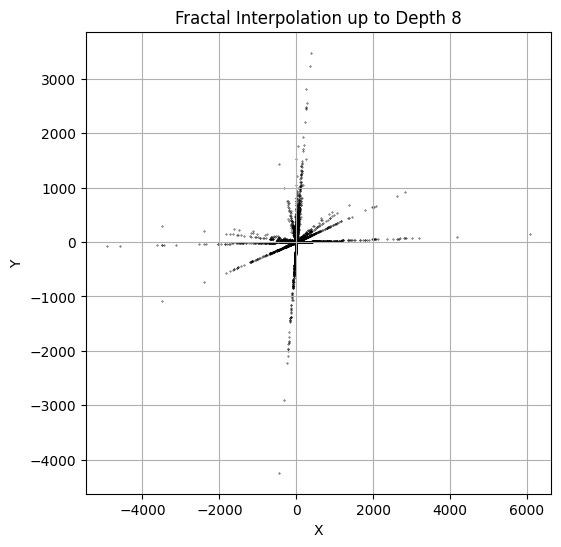

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Use one alpha function (sigmoid)
def alpha(x): return 1 / (1 + np.exp(-x))

# === Extract data from training set (first two features) ===
x = X_train_scaled[:5, 0]  # You can increase number of samples here if needed
y = X_train_scaled[:5, 1]

# Convert to NumPy and clean NaNs (just in case)
x = np.array(x)
y = np.array(y)
valid_indices = ~np.isnan(x) & ~np.isnan(y)
x = x[valid_indices]
y = y[valid_indices]

# === Define fractal function with safe division ===
def get_fractal_parameters(x, y, alpha):
    n = len(x) - 1
    e = [1]*n

    c, d, a, b = [], [], [], []
    for i in range(n):
        denom = x[n] - x[0]
        if denom == 0:
            denom = 1e-8  # Avoid division by zero

        d_val = ((x[0] * (y[i + 1 - e[i]] - alpha(x[n]) * y[n])) -
                 (x[n] * (y[i + e[i]] - alpha(x[0]) * y[0]))) / denom

        c_val = ((y[i + 1 - e[i]] - alpha(x[n]) * y[n]) -
                 (y[i + e[i]] - alpha(x[0]) * y[0])) / denom

        a_val = (x[i + 1 - e[i]] - x[i + e[i]]) / denom
        b_val = (x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / denom

        d.append(d_val)
        c.append(c_val)
        a.append(a_val)
        b.append(b_val)

    transformations = []
    for i in range(n):
        def wi(x, y, i=i):
            return [a[i] * x + b[i], alpha(x) * y + c[i] * x + d[i]]
        transformations.append(wi)

    return transformations

# === Generate fractal points ===
def generate_points(x0, y0, transformations, max_depth):
    current_points = [(x0, y0)]
    all_points_x, all_points_y = [], []

    for depth in range(max_depth):
        new_points = []
        for (x, y) in current_points:
            for transform in transformations:
                new_x, new_y = transform(x, y)
                all_points_x.append(new_x)
                all_points_y.append(new_y)
                new_points.append((new_x, new_y))
        current_points = new_points

    return all_points_x, all_points_y

# === Run the fractal process ===
transforms = get_fractal_parameters(x, y, alpha)
points_x, points_y = generate_points(0, 0, transforms, max_depth=8)

# === Plot the fractal ===
plt.figure(figsize=(6, 6))
plt.scatter(points_x, points_y, s=0.1, color="black")
plt.title("Fractal Interpolation up to Depth 8")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


In [ ]:
# 2nd try with zipper fractal

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Step 1: Clean Data ---
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Step 2: Define alpha and safe fractal transformation ---
def alpha(x): return 1 / (1 + np.exp(-x))

def get_fractal_parameters(x, y, alpha):
    n = len(x) - 1
    e = [1]*n

    c, d, a, b = [], [], [], []
    for i in range(n):
        denom = x[n] - x[0]
        if denom == 0:
            denom = 1e-8

        d_val = ((x[0] * (y[i + 1 - e[i]] - alpha(x[n]) * y[n])) -
                 (x[n] * (y[i + e[i]] - alpha(x[0]) * y[0]))) / denom

        c_val = ((y[i + 1 - e[i]] - alpha(x[n]) * y[n]) -
                 (y[i + e[i]] - alpha(x[0]) * y[0])) / denom

        a_val = (x[i + 1 - e[i]] - x[i + e[i]]) / denom
        b_val = (x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / denom

        d.append(d_val)
        c.append(c_val)
        a.append(a_val)
        b.append(b_val)

    transformations = []
    for i in range(n):
        def wi(x, y, i=i):
            return [a[i] * x + b[i], alpha(x) * y + c[i] * x + d[i]]
        transformations.append(wi)

    return transformations

def generate_fractal_features(x0, y0, transformations, max_depth):
    current_points = [(x0, y0)]
    all_points = []

    for depth in range(max_depth):
        new_points = []
        for (x, y) in current_points:
            for transform in transformations:
                new_x, new_y = transform(x, y)
                all_points.append([new_x, new_y])
                new_points.append((new_x, new_y))
        current_points = new_points

    return np.array(all_points).flatten()[:20]  # limit output size

# --- Step 3: Apply fractal transformation to full training & test data ---

def apply_fractal_to_dataset(X_scaled, max_depth=2):
    n_samples, n_features = X_scaled.shape
    transformed = []

    for row in X_scaled:
        fractal_features = []
        for i in range(0, n_features - 1, 2):  # Process feature pairs
            x = row[i:i+2]
            if len(x) < 2: continue
            x_vals = np.linspace(x[0] - 1, x[0] + 1, 5)
            y_vals = np.linspace(x[1] - 1, x[1] + 1, 5)
            transforms = get_fractal_parameters(x_vals, y_vals, alpha)
            generated = generate_fractal_features(x[0], x[1], transforms, max_depth)
            fractal_features.extend(generated)
        transformed.append(fractal_features)

    return np.array(transformed)

X_train_fractal = apply_fractal_to_dataset(X_train, max_depth=3)
X_test_fractal = apply_fractal_to_dataset(X_test, max_depth=3)

# Ensure sizes match before fitting model
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(validate=False)  # avoids warning on empty rows
X_train_combined = np.hstack([X_train, transformer.fit_transform(X_train_fractal)])
X_test_combined = np.hstack([X_test, transformer.transform(X_test_fractal)])

# --- Step 4: Train SVM ---
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_rbf.fit(X_train_combined, y_train)

y_pred = svm_rbf.predict(X_test_combined)

print("SVM with Fractal Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


SVM with Fractal Features:
Accuracy: 0.79
Confusion Matrix:
 [[916 256]
 [174 654]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1172
           1       0.72      0.79      0.75       828

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.79      0.79      0.79      2000



SVM with Fractal Features:
Accuracy: 0.79
Confusion Matrix:
 [[916 256]
 [174 654]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1172
           1       0.72      0.79      0.75       828

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.79      0.79      0.79      2000



<ipython-input-12-4caf6c1fd1ef>:136: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


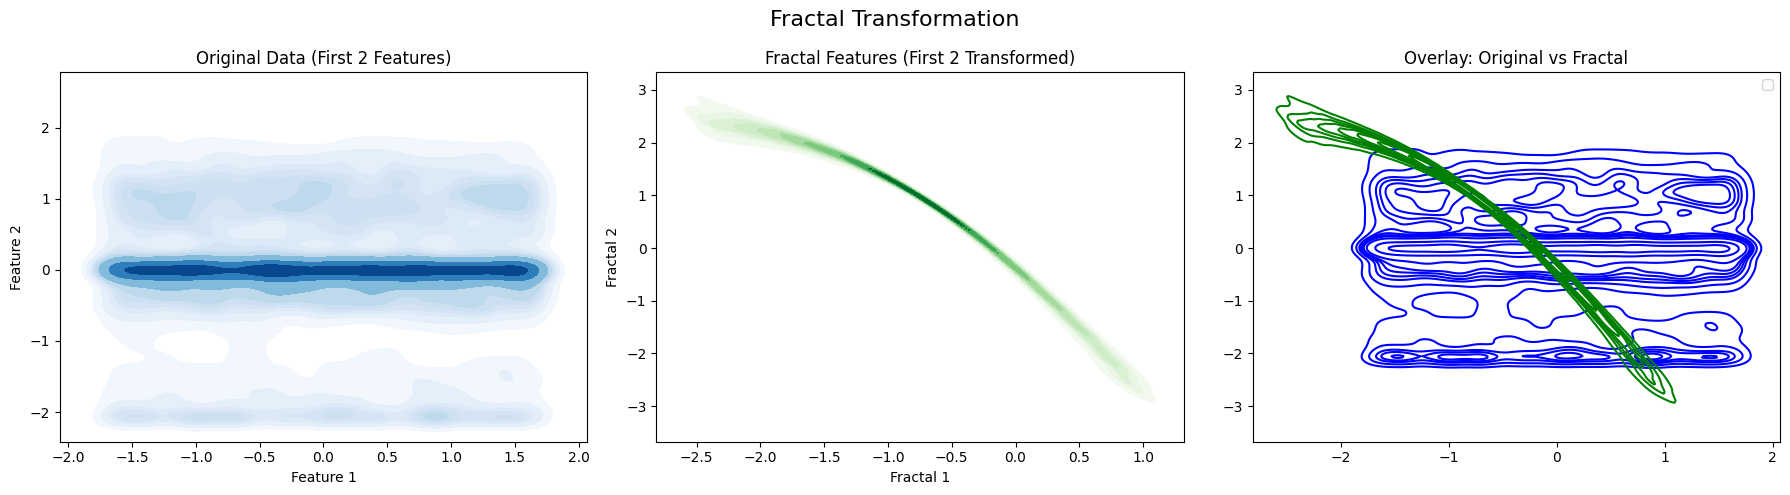

In [ ]:
#Zipper 3rd Trial
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import FunctionTransformer

# === Step 1: Data Preprocessing ===
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Step 2: Fractal Functions ===
def alpha(x): return 1 / (1 + np.exp(-x))

def get_fractal_parameters(x, y, alpha):
    n = len(x) - 1
    e = [1] * n

    c, d, a, b = [], [], [], []
    for i in range(n):
        denom = x[n] - x[0]
        if denom == 0: denom = 1e-8

        d_val = ((x[0] * (y[i + 1 - e[i]] - alpha(x[n]) * y[n])) -
                 (x[n] * (y[i + e[i]] - alpha(x[0]) * y[0]))) / denom

        c_val = ((y[i + 1 - e[i]] - alpha(x[n]) * y[n]) -
                 (y[i + e[i]] - alpha(x[0]) * y[0])) / denom

        a_val = (x[i + 1 - e[i]] - x[i + e[i]]) / denom
        b_val = (x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / denom

        d.append(d_val)
        c.append(c_val)
        a.append(a_val)
        b.append(b_val)

    transformations = []
    for i in range(n):
        def wi(x, y, i=i):
            return [a[i] * x + b[i], alpha(x) * y + c[i] * x + d[i]]
        transformations.append(wi)

    return transformations

def generate_fractal_features(x0, y0, transformations, max_depth):
    current_points = [(x0, y0)]
    all_points = []

    for depth in range(max_depth):
        new_points = []
        for (x, y) in current_points:
            for transform in transformations:
                new_x, new_y = transform(x, y)
                all_points.append([new_x, new_y])
                new_points.append((new_x, new_y))
        current_points = new_points

    return np.array(all_points).flatten()[:20]

# === Step 3: Apply Fractal Transformation to Dataset ===
def apply_fractal_to_dataset(X_scaled, max_depth=2):
    n_samples, n_features = X_scaled.shape
    transformed = []

    for row in X_scaled:
        fractal_features = []
        for i in range(0, n_features - 1, 2):  # pairwise
            x = row[i:i+2]
            if len(x) < 2: continue
            x_vals = np.linspace(x[0] - 1, x[0] + 1, 5)
            y_vals = np.linspace(x[1] - 1, x[1] + 1, 5)
            transforms = get_fractal_parameters(x_vals, y_vals, alpha)
            generated = generate_fractal_features(x[0], x[1], transforms, max_depth)
            fractal_features.extend(generated)
        transformed.append(fractal_features)

    return np.array(transformed)

X_train_fractal = apply_fractal_to_dataset(X_train, max_depth=3)
X_test_fractal = apply_fractal_to_dataset(X_test, max_depth=3)

transformer = FunctionTransformer(validate=False)
X_train_combined = np.hstack([X_train, transformer.fit_transform(X_train_fractal)])
X_test_combined = np.hstack([X_test, transformer.transform(X_test_fractal)])

# === Step 4: SVM Training ===
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_rbf.fit(X_train_combined, y_train)

y_pred = svm_rbf.predict(X_test_combined)

print("SVM with Fractal Features:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# === Step 5: Plotting ===
import seaborn as sns

def plot_before_after(X_original, X_fractal, title="Fractal Transformation"):
    plt.figure(figsize=(18, 5))

    # 1. Before
    plt.subplot(1, 3, 1)
    plt.title("Original Data (First 2 Features)")
    sns.kdeplot(x=X_original[:, 0], y=X_original[:, 1], cmap="Blues", fill=True, bw_adjust=0.5)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

    # 2. After
    plt.subplot(1, 3, 2)
    plt.title("Fractal Features (First 2 Transformed)")
    sns.kdeplot(x=X_fractal[:, 0], y=X_fractal[:, 1], cmap="Greens", fill=True, bw_adjust=0.5)
    plt.xlabel("Fractal 1")
    plt.ylabel("Fractal 2")

    # 3. Combined
    plt.subplot(1, 3, 3)
    plt.title("Overlay: Original vs Fractal")
    sns.kdeplot(x=X_original[:, 0], y=X_original[:, 1], color="blue", label="Original", bw_adjust=0.5)
    sns.kdeplot(x=X_fractal[:, 0], y=X_fractal[:, 1], color="green", label="Fractal", bw_adjust=0.5)
    plt.legend()

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Only keep first 2 fractal dimensions for visualization
X_train_fractal_vis = X_train_fractal[:, :2] if X_train_fractal.shape[1] >= 2 else np.zeros((X_train.shape[0], 2))
plot_before_after(X_train[:, :2], X_train_fractal_vis)


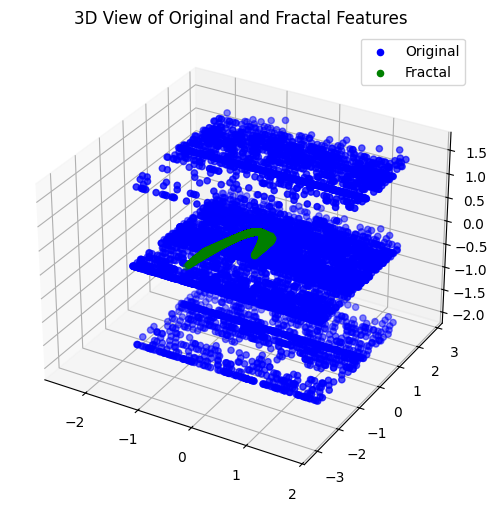

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], color='blue', label='Original')
ax.scatter(X_train_fractal[:, 0], X_train_fractal[:, 1], X_train_fractal[:, 2], color='green', label='Fractal')
ax.set_title("3D View of Original and Fractal Features")
ax.legend()
plt.show()


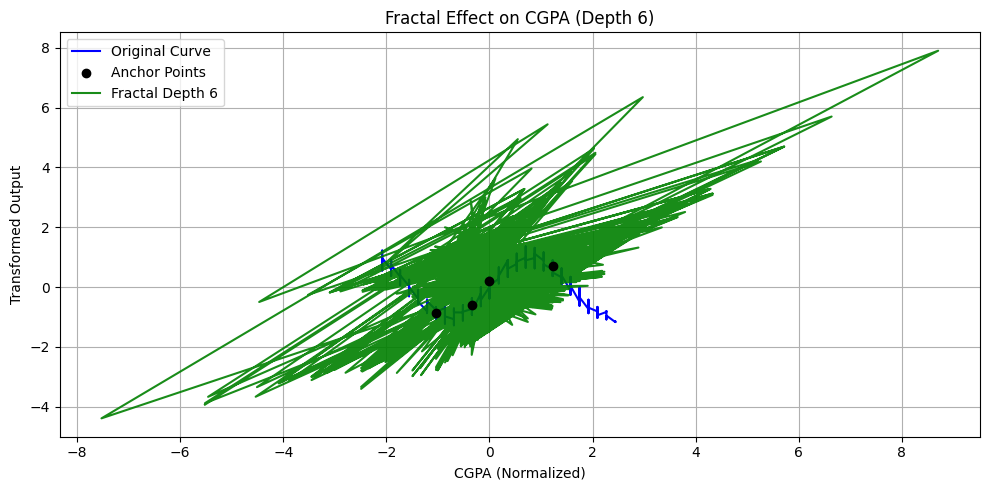

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load and normalize CGPA
cgpa = df["CGPA"].values
cgpa_norm = (cgpa - np.mean(cgpa)) / np.std(cgpa)

# Simulated target for visualization
y_original = np.sin(2 * cgpa_norm) + 0.1 * np.random.randn(len(cgpa_norm))

# Alpha function
def alpha(x):
    return 1 / (1 + np.exp(-x))

# Build transformations
def create_zipper_transform(x, y, e):
    n = len(x) - 1
    a, b, c, d = [], [], [], []

    for i in range(n):
        den = x[n] - x[0]
        if den == 0: den = 1e-6
        d_i = ((x[0] * (y[i + 1 - e[i]] - alpha(x[n]) * y[n])) -
               (x[n] * (y[i + e[i]] - alpha(x[0]) * y[0]))) / den

        c_i = ((y[i + 1 - e[i]] - alpha(x[n]) * y[n]) -
               (y[i + e[i]] - alpha(x[0]) * y[0])) / den

        a_i = (x[i + 1 - e[i]] - x[i + e[i]]) / den
        b_i = (x[n] * x[i + e[i]] - x[0] * x[i + 1 - e[i]]) / den

        a.append(a_i)
        b.append(b_i)
        c.append(c_i)
        d.append(d_i)

    transformations = []
    for i in range(n):
        def wi(x, y, i=i):
            return [a[i] * x + b[i], alpha(x) * y + c[i] * x + d[i]]
        transformations.append(wi)

    return transformations

# Fractal generator
def generate_fractal(x0, y0, transformations, depth):
    current_points = [(x0, y0)]
    result_x, result_y = [x0], [y0]

    for _ in range(depth):
        new_points = []
        for x, y in current_points:
            for transform in transformations:
                new_x, new_y = transform(x, y)
                result_x.append(new_x)
                result_y.append(new_y)
                new_points.append((new_x, new_y))
        current_points = new_points

    return result_x, result_y

# ----------- USER INPUT SECTION -----------

depth = 6  # <<< Change this value to increase fractal depth (e.g., 1 to 6)

# ------------------------------------------

# Select 4 anchor points from CGPA
anchor_idx = np.linspace(0, len(cgpa_norm) - 1, 4, dtype=int)
x_anchor = cgpa_norm[anchor_idx]
y_anchor = y_original[anchor_idx]
e = [1, 1, 1]  # For 4 anchors (n=3)

# Apply fractal transformation
transformations = create_zipper_transform(x_anchor, y_anchor, e)
fx, fy = generate_fractal(x_anchor[0], y_anchor[0], transformations, depth)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(np.sort(cgpa_norm), y_original[np.argsort(cgpa_norm)], label='Original Curve', color='blue')
plt.scatter(x_anchor, y_anchor, color='black', zorder=5, label='Anchor Points')
plt.plot(fx, fy, 'g-', alpha=0.9, label=f'Fractal Depth {depth}')
plt.title(f"Fractal Effect on CGPA (Depth {depth})")
plt.xlabel("CGPA (Normalized)")
plt.ylabel("Transformed Output")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#try to implement fractals( Attempt-1)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming df is already defined
X = df.drop(columns=["PlacementStatus"])  # Features
y = df["PlacementStatus"]  # Target variable

# Splitting dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with Optimized Gaussian RBF Kernel (Original Model)
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_rbf.fit(X_train_scaled, y_train)

# Predict & Evaluate
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print("Original RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

# ---------------------------------------------------------------------------------
# Enhancement: Fractal Gaussian RBF Kernel
# ---------------------------------------------------------------------------------

def cubic_hermite(x):
    """Define a cubic Hermite base function."""
    return (2 * x**3 - 3 * x**2 + 1)

# def fractal_transform(X, alpha):
#     """Apply fractal transformations to the feature set."""
#     return X + alpha * np.sin(X)  # A simple fractal transformation

def fractal_transform(X, alpha, depth=3):
    """
    Apply a recursive fractal transformation to the feature set.
    - `alpha`: Controls the intensity of transformation.
    - `depth`: Number of iterations for fractal pattern.
    """
    X_fractal = X.copy()

    for _ in range(depth):
        X_fractal += alpha * np.sin(2 * np.pi * X_fractal)  # Recursive pattern

    return X_fractal

# Optimizing alpha in range (-0.5 to 0.5) using step search (0.01 step size)
best_alpha = None
best_score = 0

for alpha in np.arange(-0.5, 0.5, 0.01):
    X_train_fractal = fractal_transform(X_train_scaled, alpha)
    svm_fractal = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')

    # 10-fold cross-validation
    scores = cross_val_score(svm_fractal, X_train_fractal, y_train, cv=10, scoring='accuracy')
    avg_score = np.mean(scores)

    if avg_score > best_score:
        best_score = avg_score
        best_alpha = alpha

print(f"Optimal alpha found: {best_alpha:.2f} with Cross-Validation Accuracy: {best_score:.2f}")

# Train final model using best alpha
X_train_fractal = fractal_transform(X_train_scaled, best_alpha)
X_test_fractal = fractal_transform(X_test_scaled, best_alpha)

svm_fractal_final = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_fractal_final.fit(X_train_fractal, y_train)

# Predict & Evaluate
y_pred_fractal = svm_fractal_final.predict(X_test_fractal)
print("Fractal Gaussian RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fractal):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_fractal))
print("Classification Report:\n", classification_report(y_test, y_pred_fractal))


#.....................COMPARASION..................................

import time
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Standardize Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🚀 Train Standard RBF Kernel SVM
start_time = time.time()
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_rbf.fit(X_train_scaled, y_train)
rbf_time = time.time() - start_time
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# 🚀 Train SVM with Fractal Transformation
X_train_fractal = fractal_transform(X_train_scaled, alpha=0.3, depth=3)
X_test_fractal = fractal_transform(X_test_scaled, alpha=0.3, depth=3)

start_time = time.time()
svm_fractal = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_fractal.fit(X_train_fractal, y_train)
fractal_time = time.time() - start_time
y_pred_fractal = svm_fractal.predict(X_test_fractal)

# 📊 Compare Results
print("\n🔹 Standard RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print(f"Training Time: {rbf_time:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

print("\n🔹 Fractal Gaussian Kernel SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fractal):.2f}")
print(f"Training Time: {fractal_time:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_fractal))



Original RBF SVM Performance:
Accuracy: 0.80
Confusion Matrix:
 [[950 222]
 [188 640]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



KeyboardInterrupt: 

In [ ]:
#Attempt-2

import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming df is already defined
X = df.drop(columns=["PlacementStatus"])  # Features
y = df["PlacementStatus"]  # Target variable

# Splitting dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------
# 🔹 Enhanced Fractal Transform Function
# -----------------------------------------
def fractal_transform(X, alpha, depth=3):
    """
    Apply a recursive fractal transformation to the feature set.
    - `alpha`: Controls transformation intensity.
    - `depth`: Number of iterations for fractal effect.
    """
    X_fractal = X.copy()

    for _ in range(depth):
        X_fractal += alpha * (np.sin(2 * np.pi * X_fractal) + np.cos(3 * np.pi * X_fractal))

    # Normalize to prevent feature distortion
    return (X_fractal - np.mean(X_fractal, axis=0)) / np.std(X_fractal, axis=0)

# -------------------------------------------------
# 🔍 Optimize `alpha` using Cross-Validation
# -------------------------------------------------
best_alpha = None
best_score = 0
alpha_values = np.linspace(-0.5, 0.5, 20)  # Test 20 values instead of slow arange()

for alpha in alpha_values:
    X_train_fractal = fractal_transform(X_train_scaled, alpha)
    svm_fractal = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')

    # 10-fold cross-validation
    scores = cross_val_score(svm_fractal, X_train_fractal, y_train, cv=10, scoring='accuracy', n_jobs=-1)
    avg_score = np.mean(scores)

    if avg_score > best_score:
        best_score = avg_score
        best_alpha = alpha

print(f"✅ Optimal alpha found: {best_alpha:.2f} with CV Accuracy: {best_score:.2f}")

# -----------------------------------------
# 🚀 Train Final Model with Best Alpha
# -----------------------------------------
X_train_fractal = fractal_transform(X_train_scaled, best_alpha)
X_test_fractal = fractal_transform(X_test_scaled, best_alpha)

svm_fractal_final = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_fractal_final.fit(X_train_fractal, y_train)

# Predict & Evaluate
y_pred_fractal = svm_fractal_final.predict(X_test_fractal)
print("\n🔹 Fractal Gaussian RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fractal):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_fractal))
print("Classification Report:\n", classification_report(y_test, y_pred_fractal))

# -----------------------------------------
# 🔥 Performance Comparison: RBF vs Fractal
# -----------------------------------------
start_time_rbf = time.time()
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_rbf.fit(X_train_scaled, y_train)
time_rbf = time.time() - start_time_rbf
y_pred_rbf = svm_rbf.predict(X_test_scaled)

start_time_fractal = time.time()
svm_fractal = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_fractal.fit(X_train_fractal, y_train)
time_fractal = time.time() - start_time_fractal

# 📊 Results
print("\n🔹 Standard RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print(f"Training Time: {time_rbf:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))

print("\n🔹 Optimized Fractal Gaussian Kernel SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fractal):.2f}")
print(f"Training Time: {time_fractal:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_fractal))


In [ ]:
#Attempt-3 ..................

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV

# -------------------------
# 🔹 Load and Prepare Data
# -------------------------
# Ensure df is already defined
X = df.drop(columns=["PlacementStatus"])
y = df["PlacementStatus"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------------------------------------
# 🔮 Fractal Gaussian Transformation (Improved Version)
# -----------------------------------------------------
def fractal_gaussian_transform(X, alpha, depth=3):
    X_fractal = X.copy()
    for _ in range(depth):
        X_fractal += alpha * (np.sin(2 * np.pi * X_fractal) + np.cos(3 * np.pi * X_fractal))
    # Normalize after transformation
    return (X_fractal - np.mean(X_fractal, axis=0)) / np.std(X_fractal, axis=0)

# ----------------------------------------------------------------------
# 🔍 Search Best Alpha, C, Gamma using GridSearchCV (with Fractal SVM)
# ----------------------------------------------------------------------
best_model = None
best_accuracy = 0
best_alpha = None

alpha_values = np.linspace(-0.5, 0.5, 10)
param_grid = {
    'C': [1, 10, 50, 100],
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

for alpha in alpha_values:
    X_train_fractal = fractal_gaussian_transform(X_train_scaled, alpha)

    grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_fractal, y_train)

    if grid.best_score_ > best_accuracy:
        best_accuracy = grid.best_score_
        best_model = grid.best_estimator_
        best_alpha = alpha

print(f"\n✅ Best Alpha: {best_alpha:.3f}")
print(f"✅ Best SVM Parameters: {best_model.get_params()}")
print(f"✅ Best CV Accuracy: {best_accuracy:.4f}")

# -----------------------------------------------
# 🚀 Final Training using Optimal Parameters
# -----------------------------------------------
X_train_final = fractal_gaussian_transform(X_train_scaled, best_alpha)
X_test_final = fractal_gaussian_transform(X_test_scaled, best_alpha)

start_time_fractal = time.time()
best_model.fit(X_train_final, y_train)
time_fractal = time.time() - start_time_fractal

y_pred_fractal = best_model.predict(X_test_final)

print("\n🔹 Fractal Gaussian RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_fractal):.4f}")
print(f"Training Time: {time_fractal:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_fractal))
print("Classification Report:\n", classification_report(y_test, y_pred_fractal))





✅ Best Alpha: 0.056
✅ Best SVM Parameters: {'C': 100, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
✅ Best CV Accuracy: 0.7981

🔹 Fractal Gaussian RBF SVM Performance:
Accuracy: 0.7930
Training Time: 2.66 seconds
Confusion Matrix:
 [[943 229]
 [185 643]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      1172
           1       0.74      0.78      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000


🔹 Baseline RBF SVM Performance:
Accuracy: 0.7905
Training Time: 2.31 seconds
Confusion Matrix:
 [[910 262]
 [157 671]]
Classification Report:
               precisio

In [ ]:
# -----------------------------------------------
# 🧪 Baseline: Standard RBF SVM (no Fractals)
# -----------------------------------------------
svm_baseline = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')

start_time_baseline = time.time()
svm_baseline.fit(X_train_scaled, y_train)
time_baseline = time.time() - start_time_baseline

y_pred_baseline = svm_baseline.predict(X_test_scaled)

print("\n🔹 Baseline RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_baseline):.4f}")
print(f"Training Time: {time_baseline:.2f} seconds")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("Classification Report:\n", classification_report(y_test, y_pred_baseline))


🔹 Baseline RBF SVM Performance:
Accuracy: 0.7950
Training Time: 5.83 seconds
Confusion Matrix:
 [[950 222]
 [188 640]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



In [ ]:
# # Encode categorical labels (y_train, y_test)
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# # Step 5: Train and evaluate Linear SVM
# svm_linear = SVC(kernel='linear', C=1)
# svm_linear.fit(X_train, y_train)
# y_pred_linear = svm_linear.predict(X_test)

# print("Linear SVM Performance:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
# print("Classification Report:\n", classification_report(y_test, y_pred_linear))

# # Step 6: Train and evaluate SVM with RBF kernel
# svm_rbf = SVC(kernel='rbf', C=1, gamma=0.125)
# svm_rbf.fit(X_train, y_train)
# y_pred_rbf = svm_rbf.predict(X_test)

# print("RBF SVM Performance:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
# print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

# # Step 7: Visualize confusion matrices properly
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Linear SVM Confusion Matrix
# disp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linear))
# disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
# axes[0].set_title('Linear SVM Confusion Matrix')

# # RBF SVM Confusion Matrix
# disp2 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf))
# disp2.plot(ax=axes[1], cmap='Greens', values_format='d')
# axes[1].set_title('RBF SVM Confusion Matrix')

# plt.tight_layout()
# plt.show()


In [ ]:
print(y.isnull().sum())


0


In [ ]:
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Fix missing values in y_train (impute with the most frequent value)
# y_train = y_train.to_numpy()  # Convert y_train to a NumPy array
# imputer_y = SimpleImputer(strategy='most_frequent')
# y_train = imputer_y.fit_transform(y_train.reshape(-1, 1)).ravel()  # Convert to 1D array

# # Check again for any missing values
# print("Missing values in X_train after imputation:", np.isnan(X_train).sum())
# print("Missing values in y_train after imputation:", np.isnan(y_train).sum())

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# # Step 5: Train and evaluate Linear SVM
# svm_linear = SVC(kernel='linear', C=1)
# svm_linear.fit(X_train, y_train)
# y_pred_linear = svm_linear.predict(X_test)

# print("Linear SVM Performance:")
# print(f"Accuracy: {accuracy_score(y_test, y_pred_linear):.2f}")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))
# print("Classification Report:\n", classification_report(y_test, y_pred_linear))




Linear SVM Performance:
Accuracy: 0.79
Confusion Matrix:
 [[937 235]
 [186 642]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1172
           1       0.73      0.78      0.75       828

    accuracy                           0.79      2000
   macro avg       0.78      0.79      0.78      2000
weighted avg       0.79      0.79      0.79      2000



####### Doing testing /checking from scretch

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Assuming df is already defined, and you have the PlacementStatus as the target variable

# Define features (X) and target variable (y)
X = df.drop(columns=["PlacementStatus"])  # Features
y = df["PlacementStatus"]  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on testing data

# Define the Linear SVM model
class SVM:
    def __init__(self, C=1, learning_rate=0.001, max_iter=1000):
        self.C = C  # Regularization parameter
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.w = None  # Weight vector
        self.b = None  # Bias term

    # Hinge loss function
    def hinge_loss(self, X, y):
        margins = y * (np.dot(X, self.w) + self.b)
        loss = np.mean(np.maximum(0, 1 - margins))  # Mean of hinge loss
        return loss

    # Fit method to train the SVM
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.w = np.zeros(num_features)  # Initialize weights to zero
        self.b = 0  # Initialize bias to zero

        # Gradient descent
        for _ in range(self.max_iter):
            for i in range(num_samples):
                margin = y[i] * (np.dot(X[i], self.w) + self.b)

                # Update the weights using gradient descent (hinge loss gradient)
                if margin >= 1:
                    dw = self.w  # No update if margin is greater than 1
                else:
                    dw = self.w - self.C * y[i] * X[i]  # Update if margin is less than 1

                db = -self.C * y[i] if margin < 1 else 0  # Update bias if margin < 1

                # Gradient descent update rule
                self.w -= self.learning_rate * dw
                self.b -= self.learning_rate * db

            # Optionally, print loss for debugging
            loss = self.hinge_loss(X, y)
            # print(f"Iteration {_+1}, Loss: {loss}")  # Uncomment for debugging

    # Predict method to classify the data
    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)  # Predict based on the decision boundary

# Initialize the model with a linear kernel (you can modify C and learning rate)
svm = SVM(C=1, learning_rate=0.001, max_iter=2000)

# Fit the model on the scaled training data
svm.fit(X_train_scaled, y_train.values)  # Ensure that y_train is in the correct format (numpy array)

# Predict on the scaled test data
y_pred = svm.predict(X_test_scaled)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.414


In [ ]:
# Train RBF SVM with better parameters
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.001, class_weight='balanced')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

# Evaluate again
print("Improved RBF SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rbf):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))


Improved RBF SVM Performance:
Accuracy: 0.80
Confusion Matrix:
 [[950 222]
 [188 640]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.80      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.80      0.80      2000



# Step 7: Visualize confusion matrices properly

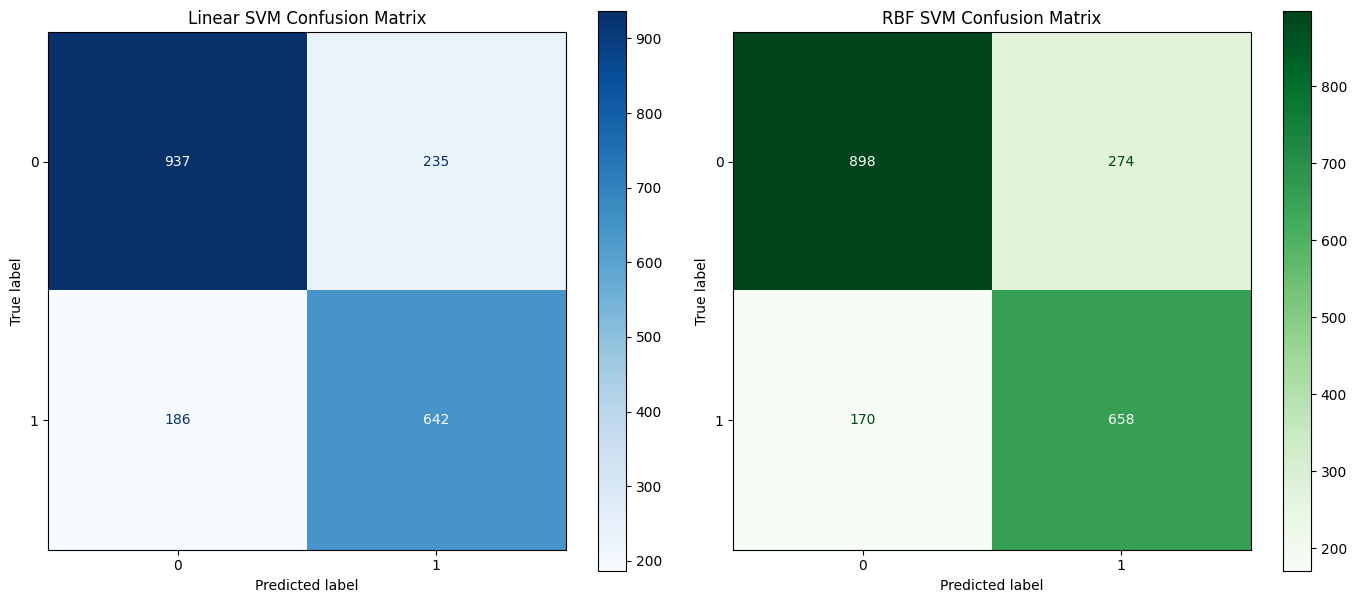

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Linear SVM Confusion Matrix
disp1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_linear))
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Linear SVM Confusion Matrix')

# RBF SVM Confusion Matrix
disp2 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rbf))
disp2.plot(ax=axes[1], cmap='Greens', values_format='d')
axes[1].set_title('RBF SVM Confusion Matrix')

plt.tight_layout()
plt.show()


### 🔹 Understanding the "Center" in SVM with RBF Kernel

In [ ]:
import numpy as np

# Get support vectors
support_vectors = svm_rbf.support_vectors_

# Compute the centroid (average of all support vectors)
rbf_center = np.mean(support_vectors, axis=0)

print("Approximate Center of RBF Kernel SVM:", rbf_center)


Approximate Center of RBF Kernel SVM: [-0.01635058  0.04896427 -0.04142906  0.06277528 -0.04195118  0.09591033
  0.08243615  0.24800673  0.18832013  0.12156444  0.08186284]




#### 1️⃣ What does this vector represent?
This vector represents the **approximate "center"** of the SVM decision boundary in the **feature space**. It is computed as the **mean of all support vectors**, which are the most important data points influencing classification.

#### 2️⃣ Why does SVM with RBF not have a fixed center?
Unlike clustering methods (e.g., **k-means**), SVM with an **RBF kernel** does not use a **single predefined center**. Instead, it **maps data into a higher-dimensional space** and learns a decision boundary by using **support vectors**.

#### 3️⃣ What does each number in the vector mean?
Each number corresponds to **one feature** in the dataset. The values indicate the **approximate location** in the feature space where the **support vectors are concentrated**.

#### 4️⃣ Why did you compute the mean of support vectors?
Since **support vectors** are the key points that determine the decision boundary, their **centroid provides an approximation** of the "center" around which the decision boundary is shaped.
